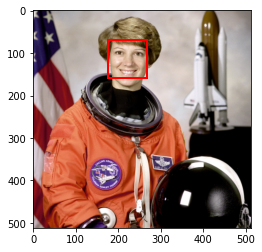

In [1]:
# Face detection using a cascade classifier

from skimage import data
from skimage.feature import Cascade

import matplotlib.pyplot as plt
from matplotlib import patches

# Load the trained file from the module root.
trained_file = data.lbp_frontal_face_cascade_filename()

# Initialize the detector cascade.
detector = Cascade(trained_file)

img = data.astronaut()

detected = detector.detect_multi_scale(img=img,
                                       scale_factor=1.2,
                                       step_ratio=1,
                                       min_size=(60, 60),
                                       max_size=(123, 123))

plt.imshow(img)
img_desc = plt.gca()
plt.set_cmap('gray')

for patch in detected:

    img_desc.add_patch(
        patches.Rectangle(
            (patch['c'], patch['r']),
            patch['width'],
            patch['height'],
            fill=False,
            color='r',
            linewidth=2
        )
    )

plt.show()

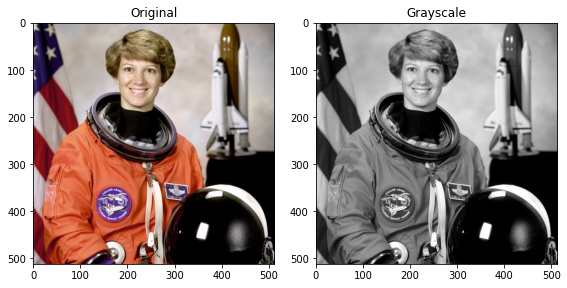

In [2]:
#RGB to grayscale
import matplotlib.pyplot as plt

from skimage import data
from skimage.color import rgb2gray

original = data.astronaut()
grayscale = rgb2gray(original)

fig, axes = plt.subplots(1, 2, figsize=(8, 4))
ax = axes.ravel()

ax[0].imshow(original)
ax[0].set_title("Original")
ax[1].imshow(grayscale, cmap=plt.cm.gray)
ax[1].set_title("Grayscale")

fig.tight_layout()
plt.show()

In [ ]:
"""Visual image comparison
Image comparison is particularly useful when performing image 
processing tasks such as exposure manipulations, filtering, and restoration.
This example shows how to easily compare two images with various approaches."""

In [3]:
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec

from skimage import data, transform, exposure
from skimage.util import compare_images


img1 = data.coins()
img1_equalized = exposure.equalize_hist(img1)
img2 = transform.rotate(img1, 2)


comp_equalized = compare_images(img1, img1_equalized, method='checkerboard')
diff_rotated = compare_images(img1, img2, method='diff')
blend_rotated = compare_images(img1, img2, method='blend')

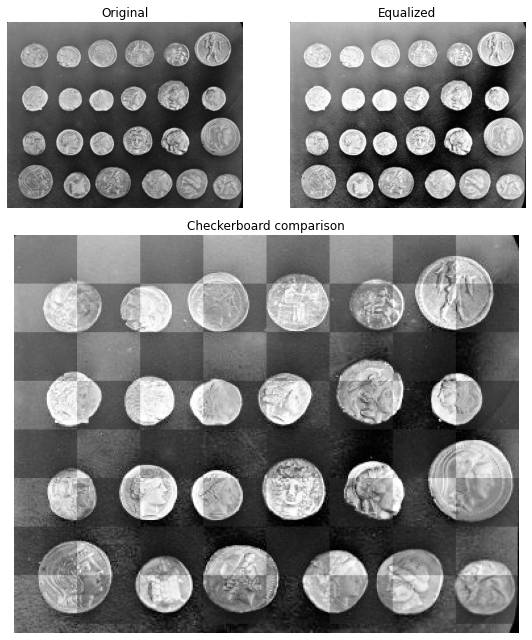

In [4]:
# The checkerboard method alternates tiles from the first and the second images.
fig = plt.figure(figsize=(8, 9))

gs = GridSpec(3, 2)
ax0 = fig.add_subplot(gs[0, 0])
ax1 = fig.add_subplot(gs[0, 1])
ax2 = fig.add_subplot(gs[1:, :])

ax0.imshow(img1, cmap='gray')
ax0.set_title('Original')
ax1.imshow(img1_equalized, cmap='gray')
ax1.set_title('Equalized')
ax2.imshow(comp_equalized, cmap='gray')
ax2.set_title('Checkerboard comparison')
for a in (ax0, ax1, ax2):
    a.axis('off')
plt.tight_layout()
# plt.plot()

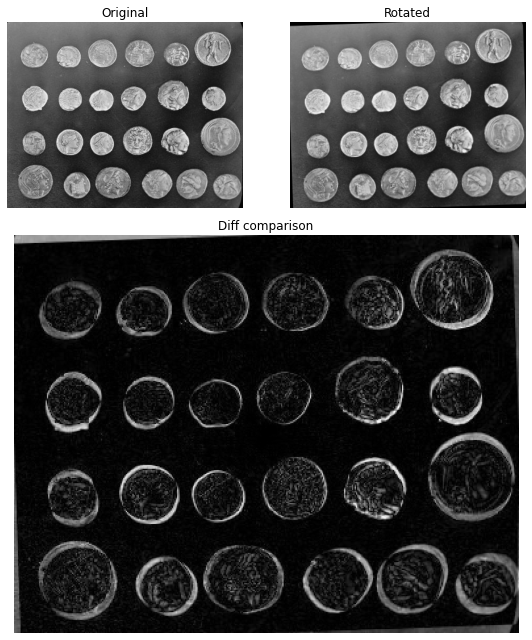

In [5]:
fig = plt.figure(figsize=(8, 9))

gs = GridSpec(3, 2)
ax0 = fig.add_subplot(gs[0, 0])
ax1 = fig.add_subplot(gs[0, 1])
ax2 = fig.add_subplot(gs[1:, :])

ax0.imshow(img1, cmap='gray')
ax0.set_title('Original')
ax1.imshow(img2, cmap='gray')
ax1.set_title('Rotated')
ax2.imshow(diff_rotated, cmap='gray')
ax2.set_title('Diff comparison')
for a in (ax0, ax1, ax2):
    a.axis('off')
plt.tight_layout()
# plt.plot()

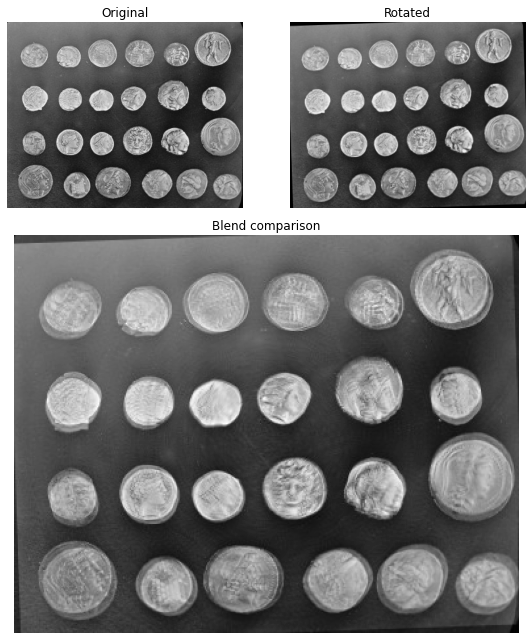

In [6]:
# blend is the result of the average of the two images.
fig = plt.figure(figsize=(8, 9))

gs = GridSpec(3, 2)
ax0 = fig.add_subplot(gs[0, 0])
ax1 = fig.add_subplot(gs[0, 1])
ax2 = fig.add_subplot(gs[1:, :])

ax0.imshow(img1, cmap='gray')
ax0.set_title('Original')
ax1.imshow(img2, cmap='gray')
ax1.set_title('Rotated')
ax2.imshow(blend_rotated, cmap='gray')
ax2.set_title('Blend comparison')
for a in (ax0, ax1, ax2):
    a.axis('off')
plt.tight_layout()
# plt.plot()

In [4]:
# Render text onto an image
import matplotlib.pyplot as plt
import numpy as np
from skimage import data

img = data.cat()

fig = plt.figure()
fig.figimage(img, resize=True)
fig.text(0, 0.99, "I am stefan's cat.", fontsize=32, va="top")
fig.canvas.draw()
annotated_img = np.asarray(fig.canvas.renderer.buffer_rgba())
plt.close(fig)

ModuleNotFoundError: No module named 'skimage'

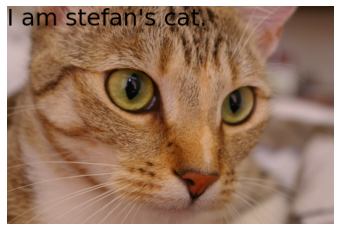

In [8]:
fig, ax = plt.subplots()
ax.imshow(annotated_img)
ax.set_axis_off()
# ax.set_position([1, 1, 1, 1])
plt.show()

In [2]:
# How to Extract Text from Images with Python?

from PIL import Image
from pytesseract import pytesseract

In [9]:

# Defining paths to tesseract.exe
# and the image we would be using

#For windows: download the exe file from
#https://github.com/UB-Mannheim/tesseract/wiki

#Windows users
# path_to_tesseract = "C:/Program Files/Tesseract-OCR/tesseract.exe"

#Mac users
path_to_tesseract = "/usr/local/bin/tesseract"
image_path = "Screenshot_134524.png"

# Opening the image & storing it in an image object
img = Image.open(image_path)

# Providing the tesseract executable
# location to pytesseract library
pytesseract.tesseract_cmd = path_to_tesseract

# Passing the image object to image_to_string() function
# This function will extract the text from the image
text = pytesseract.image_to_string(img)

# Displaying the extracted text
print(text)


PermissionError: [Errno 13] Permission denied: '/usr/share/tesseract'